In [1]:
"""
!pip3 install --upgrade pip
!pip3 install kaggle

# you need to download the kaggle.json file from the kaggle website.
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# you need to accept the rules.
!kaggle competitions download -c dogs-vs-cats

!unzip ./dogs-vs-cats.zip
!unzip -qq ./train.zip
!rm -rf ./dogs-vs-cats.zip
!rm -rf ./train.zip

import os, shutil
"""
import pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cat_vs_dogs_small")

"""
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg"
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", 0, 1000)
make_subset("validation", 1000, 1500)
make_subset("test", 1500, 2500)
"""

'\ndef make_subset(subset_name, start_index, end_index):\n    for category in ("cat", "dog"):\n        dir = new_base_dir / subset_name / category\n        os.makedirs(dir)\n        fnames = [f"{category}.{i}.jpg"\n                  for i in range(start_index, end_index)]\n        for fname in fnames:\n            shutil.copyfile(src=original_dir / fname,\n                            dst=dir / fname)\n\nmake_subset("train", 0, 1000)\nmake_subset("validation", 1000, 1500)\nmake_subset("test", 1500, 2500)\n'

In [2]:
import keras
from keras import layers

inputs = keras.Input(shape=(180, 180, 3))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

2023-09-13 14:59:09.095468: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

2023-09-13 14:59:10.476228: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-13 14:59:10.494191: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-13 14:59:10.494385: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [5]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory=new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    directory=new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    directory=new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_dataset:
    print(f"data batch size: {data_batch.shape}")
    print(f"label batch size: {labels_batch.shape}")
    break

data batch size: (32, 180, 180, 3)
label batch size: (32,)


In [9]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.x",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


62/63 [============================>.] - ETA: 0s - loss: 0.6825 - accuracy: 0.5837INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


63/63 [==============================] - 3s 42ms/step - loss: 0.6820 - accuracy: 0.5845 - val_loss: 0.6743 - val_accuracy: 0.5340
Epoch 2/30
61/63 [============================>.] - ETA: 0s - loss: 0.6626 - accuracy: 0.6101INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


63/63 [==============================] - 3s 41ms/step - loss: 0.6619 - accuracy: 0.6105 - val_loss: 0.6360 - val_accuracy: 0.6210
Epoch 3/30
63/63 [==============================] - 2s 29ms/step - loss: 0.6284 - accuracy: 0.6455 - val_loss: 0.6573 - val_accuracy: 0.5890
Epoch 4/30
61/63 [============================>.] - ETA: 0s - loss: 0.6007 - accuracy: 0.6788INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


63/63 [==============================] - 2s 38ms/step - loss: 0.6002 - accuracy: 0.6795 - val_loss: 0.6163 - val_accuracy: 0.6540
Epoch 5/30
63/63 [==============================] - 2s 29ms/step - loss: 0.5630 - accuracy: 0.7005 - val_loss: 0.6300 - val_accuracy: 0.6610
Epoch 6/30
61/63 [============================>.] - ETA: 0s - loss: 0.5451 - accuracy: 0.7310INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


63/63 [==============================] - 2s 39ms/step - loss: 0.5447 - accuracy: 0.7330 - val_loss: 0.5839 - val_accuracy: 0.6930
Epoch 7/30
61/63 [============================>.] - ETA: 0s - loss: 0.4985 - accuracy: 0.7649INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


63/63 [==============================] - 2s 39ms/step - loss: 0.4968 - accuracy: 0.7660 - val_loss: 0.5537 - val_accuracy: 0.7360
Epoch 8/30
63/63 [==============================] - 2s 29ms/step - loss: 0.4382 - accuracy: 0.7935 - val_loss: 0.6182 - val_accuracy: 0.7270
Epoch 9/30
63/63 [==============================] - 2s 29ms/step - loss: 0.3904 - accuracy: 0.8215 - val_loss: 0.6733 - val_accuracy: 0.7330
Epoch 10/30
63/63 [==============================] - 2s 29ms/step - loss: 0.3158 - accuracy: 0.8675 - val_loss: 0.6462 - val_accuracy: 0.7480
Epoch 11/30
63/63 [==============================] - 2s 29ms/step - loss: 0.2442 - accuracy: 0.9000 - val_loss: 0.8085 - val_accuracy: 0.7330
Epoch 12/30
63/63 [==============================] - 2s 29ms/step - loss: 0.2077 - accuracy: 0.9175 - val_loss: 0.7803 - val_accuracy: 0.7370
Epoch 13/30
63/63 [==============================] - 2s 29ms/step - loss: 0.1323 - accuracy: 0.9530 - val_loss: 1.0104 - val_accuracy: 0.7430
Epoch 14/30
63/63 [=

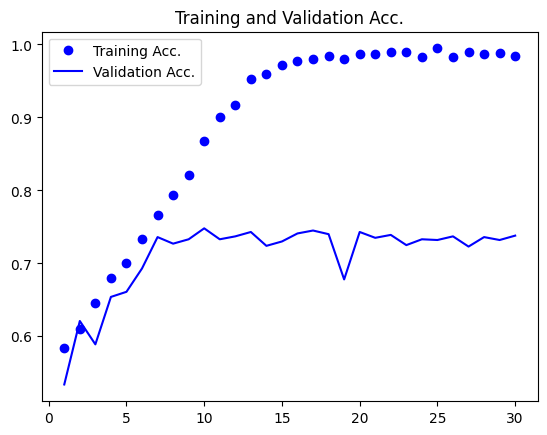

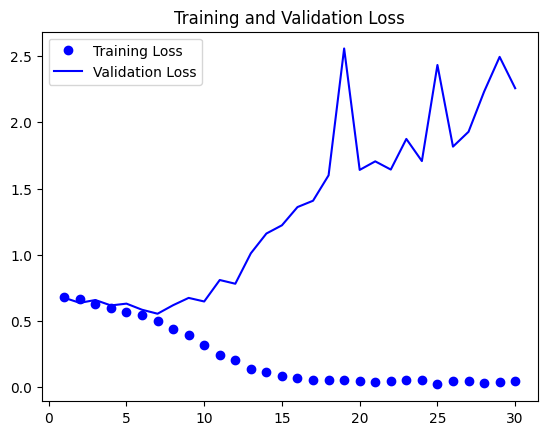

In [10]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training Acc.")
plt.plot(epochs, val_accuracy, "b", label="Validation Acc.")
plt.title("Training and Validation Acc.")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [11]:
test_model = keras.models.load_model("./convnet_from_scratch.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"test acc: {test_acc:.3f}")

63/63 [==============================] - 1s 11ms/step - loss: 0.5418 - accuracy: 0.7270
test acc: 0.727
